In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sodapy import Socrata
from datetime import datetime



# List of CO Marijuana Dispensaries

In [2]:
#Get CO dispensary data

# We're pulling data on all of the licensed businesses in CO from data.colorado.gov using 
# Socrata Open Data API
# Example for using an authenticated client (needed for non-public datasets):
# client = Socrata(data.colorado.gov,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

client = Socrata("data.colorado.gov", "YKIL3gl973fnPvtdQYaGHnNxA", username="stefanie.huckleberry@gmail.com", 
                 password="d4V7hrdazyhsv79")

# Get the first 400,000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.  We'll use this to cross reference with the list of dispensaries
result_list = client.get("4eit-nuxn", limit=400000, principalstate="CO")

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(result_list)

new_results_df = results_df.drop(columns={'mailingaddress1', 'mailingaddress2', 'mailingcity', 'mailingstate', 'mailingzipcode',
                                          'mailingcountry', 'agentfirstname', 'agentmiddlename', 'agentlastname',
                                          'agentsuffix', 'agentorganizationname', 'agentprincipaladdress1', 'agentprincipaladdress2',
                                          'agentprincipalcity', 'agentprincipalstate', 'agentprincipalzipcode', 
                                          'agentprincipalcountry', 'agentmailingaddress1', 'agentmailingaddress2', 'agentmailingcity',
                                          'agentmailingstate', 'agentmailingzipcode', 'agentmailingcountry'})


In [3]:
#Format the date the business was formed.  This date will be used to determine if the business
#was opened before legalization of marijuana (2014/1) or after.

new_results_df['entityformdate'] = pd.to_datetime(new_results_df['entityformdate'], format='%Y/%m/%d')

new_results_df.head()


,entityformdate,entityid,entityname,entitystatus,entitytype,jurisdictonofformation,principaladdress1,principaladdress2,principalcity,principalcountry,principalstate,principalzipcode
0,2013-02-28,20131137686,Karla Corea Ltd.,Good Standing,Corporation,CO,Xanadu Corp,308 E Fifth,Golden,US,CO,80401
1,2013-02-28,20131139531,"Coach's Journey, LLC",Good Standing,Limited Liability Company,CO,5873 Jaguar Way,NaN,Lone Tree,US,CO,80124
2,2013-02-28,20131141470,Rocky Mountain Holdings Inc.,Good Standing,Corporation,CO,Xanadu Corp,308 E Fifth,Golden,US,CO,80401
3,2013-02-28,20131141475,Rocky Mountain Financial Corp.,Good Standing,Corporation,CO,c/o Xanadu Corp.,308 E Fifth,Golden,US,CO,80401
4,2013-02-28,20131141482,OTC Financial Corp.,Good Standing,Corporation,CO,Xanadu Corp,308 E Fifth,Golden,US,CO,80401


In [30]:
#The entityformdate is the date the business was opened.  We will use this
#date to determine if the business was opened before legalization (Jan 1, 2014) or after

new_results_df['entityformdate'] = pd.to_datetime(new_results_df['entityformdate'], format='%Y/%m/%d')

new_results_df.head()

,entityformdate,entityid,entityname,entitystatus,entitytype,jurisdictonofformation,principaladdress1,principaladdress2,principalcity,principalcountry,principalstate,principalzipcode
0,2013-02-28,20131137686,Karla Corea Ltd.,Good Standing,Corporation,CO,Xanadu Corp,308 E Fifth,Golden,US,CO,80401
1,2013-02-28,20131139531,"Coach's Journey, LLC",Good Standing,Limited Liability Company,CO,5873 Jaguar Way,NaN,Lone Tree,US,CO,80124
2,2013-02-28,20131141470,Rocky Mountain Holdings Inc.,Good Standing,Corporation,CO,Xanadu Corp,308 E Fifth,Golden,US,CO,80401
3,2013-02-28,20131141475,Rocky Mountain Financial Corp.,Good Standing,Corporation,CO,c/o Xanadu Corp.,308 E Fifth,Golden,US,CO,80401
4,2013-02-28,20131141482,OTC Financial Corp.,Good Standing,Corporation,CO,Xanadu Corp,308 E Fifth,Golden,US,CO,80401


In [31]:
#Slice the dataframe to show only businesses opened after 12/31/2012.
#This will cut down on the overall number.

mask = (new_results_df['entityformdate'] > '2012-12-31')

formed_after_df = new_results_df.loc[mask]

#rename the principaladdress1 column so that we can attempt a merge on it later

formed_after_df = formed_after_df.rename(columns={'principaladdress1' : 'Street'})
formed_after_df.head()

,entityformdate,entityid,entityname,entitystatus,entitytype,jurisdictonofformation,Street,principaladdress2,principalcity,principalcountry,principalstate,principalzipcode
0,2013-02-28,20131137686,Karla Corea Ltd.,Good Standing,Corporation,CO,Xanadu Corp,308 E Fifth,Golden,US,CO,80401
1,2013-02-28,20131139531,"Coach's Journey, LLC",Good Standing,Limited Liability Company,CO,5873 Jaguar Way,NaN,Lone Tree,US,CO,80124
2,2013-02-28,20131141470,Rocky Mountain Holdings Inc.,Good Standing,Corporation,CO,Xanadu Corp,308 E Fifth,Golden,US,CO,80401
3,2013-02-28,20131141475,Rocky Mountain Financial Corp.,Good Standing,Corporation,CO,c/o Xanadu Corp.,308 E Fifth,Golden,US,CO,80401
4,2013-02-28,20131141482,OTC Financial Corp.,Good Standing,Corporation,CO,Xanadu Corp,308 E Fifth,Golden,US,CO,80401


In [32]:
#The list of licensed marijuana dispensaries was downloaded as an Excel file
#from this site:  https://www.colorado.gov/pacific/enforcement/med-licensed-facilities

#read in the marijuana businesses from csv and put into a dataframe

mj_stores_df = pd.read_csv('CO Recreational Marijuana Stores.csv')
mj_stores_df.head()

,Licensee,DBA,License #,Street,City,Zip
0,10185 RIDGE LLC,EVERBLOOM,402R-00763,10185 West 49th Avenue,Wheat Ridge,80033
1,1-11 LLC,1:11,402R-00581,17034 Highway 17,Moffat,81143
2,1617 WAZEE STREET LLC,LODO WELLNESS CENTER,402R-00081,"1617 Wazee Street, Unit B",Denver,80202
3,2760 HAMPDEN INC,THE FIRE PLACE,402R-00757,2800 West Hampden Avenue,Sheridan,80110
4,3B FEDERAL1 LLC,BUDDY BOY,402R-00664,155 North Federal Boulevard,Denver,80219


In [33]:
#Merge the marijuana dispensary list with the full list of CO licensed
#businesses so we can get the date the dispensary was opened.  This column
#was not available in the dispensary list pulled off the web

merged_df = pd.merge(formed_after_df, mj_stores_df, on='Street')
merged_df.head()

len(merged_df)

25

# Housing Valuation Data

In [34]:
#The Zillow website has a research section that allows you to download all
# sorts of housing data:  https://www.zillow.com/research/data/
# I downloaded an Excel file called "ZHVI (Zillow Housing Value Index) Summary"
# for this analysis.

#Import CSV file of Colorado home valuation by zip code from January 2010 - July 2018

zillow_df = pd.read_csv('Zillow_CO_Home_Value_Index.csv')
zillow_df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,2010-01,2010-02,2010-03,...,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07
0,93194,80002,Arvada,CO,Denver,Jefferson,5587,184700.0,185000.0,184600.0,...,347200,352500,357700,363000,367600,370800,372100,373900,375800,376800
1,93195,80003,Arvada,CO,Denver,Jefferson,2257,186700.0,186900.0,187300.0,...,342800,346400,350300,354700,358900,361800,363400,364800,366100,366900
2,93196,80004,Arvada,CO,Denver,Jefferson,2029,214100.0,214400.0,214300.0,...,384100,386800,389600,394300,399500,403300,404200,404000,404200,404800
3,93197,80005,Arvada,CO,Denver,Jefferson,3875,252600.0,252900.0,252900.0,...,418500,419800,421300,424400,427800,429800,429400,428600,428900,430100
4,93199,80007,Arvada,CO,Denver,Jefferson,7864,414000.0,414900.0,413900.0,...,579600,579600,578300,582100,589700,595800,598700,601300,603000,603100


In [35]:
#Rename the RegionName field to Zipcode

zillow_df = zillow_df.rename(columns={'RegionName' : 'Zipcode'})
zillow_df.head()



,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,2010-01,2010-02,2010-03,...,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07
0,93194,80002,Arvada,CO,Denver,Jefferson,5587,184700.0,185000.0,184600.0,...,347200,352500,357700,363000,367600,370800,372100,373900,375800,376800
1,93195,80003,Arvada,CO,Denver,Jefferson,2257,186700.0,186900.0,187300.0,...,342800,346400,350300,354700,358900,361800,363400,364800,366100,366900
2,93196,80004,Arvada,CO,Denver,Jefferson,2029,214100.0,214400.0,214300.0,...,384100,386800,389600,394300,399500,403300,404200,404000,404200,404800
3,93197,80005,Arvada,CO,Denver,Jefferson,3875,252600.0,252900.0,252900.0,...,418500,419800,421300,424400,427800,429800,429400,428600,428900,430100
4,93199,80007,Arvada,CO,Denver,Jefferson,7864,414000.0,414900.0,413900.0,...,579600,579600,578300,582100,589700,595800,598700,601300,603000,603100


In [51]:
#Summarize the dataframe by decade

#Create a new dataframe to hold the decades
zillow_df_sum = pd.DataFrame(columns=['City', '2010', '2011', '2012', '2013', '2014',
                                      '2015', '2016', '2017', '2018'])

#Load the cities into the new summary dataframe
zillow_df_sum['City'] = zillow_df['City']

#Calculate the average home value index (HVI) for each decade and append it to the new dataframe
zillow_df_sum['2010'] = round(zillow_df.iloc[:, -103:-91].mean(axis=1), 0)

zillow_df_sum['2011'] = round(zillow_df.iloc[:, -91:-79].mean(axis=1), 0)

zillow_df_sum['2012'] = round(zillow_df.iloc[:, -79:-67].mean(axis=1), 0)

zillow_df_sum['2013'] = round(zillow_df.iloc[:, -67:-55].mean(axis=1), 0)

zillow_df_sum['2014'] = round(zillow_df.iloc[:, -55:-43].mean(axis=1), 0)

zillow_df_sum['2015'] = round(zillow_df.iloc[:, -43:-31].mean(axis=1), 0)

zillow_df_sum['2016'] = round(zillow_df.iloc[:, -31:-19].mean(axis=1), 0)

zillow_df_sum['2017'] = round(zillow_df.iloc[:, -19:-7].mean(axis=1), 0)

zillow_df_sum['2018'] = round(zillow_df.iloc[:, -7:].mean(axis=1), 0)

zillow_df_sum.head()


,City,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Arvada,182758.0,172667.0,178025.0,195475.0,223100.0,264000.0,300667.0,337842.0,371429.0
1,Arvada,187267.0,180242.0,186417.0,204825.0,226567.0,265442.0,303717.0,337267.0,362371.0
2,Arvada,213025.0,208775.0,217150.0,231358.0,255917.0,297650.0,346867.0,380417.0,402043.0
3,Arvada,251450.0,244542.0,254000.0,276817.0,301075.0,339292.0,377967.0,412917.0,428429.0
4,Arvada,410225.0,407950.0,415908.0,441367.0,466367.0,508400.0,545400.0,575333.0,596243.0


In [57]:
#Now summarize for each city

zillow_df_sum = round(zillow_df_sum.groupby('City').mean(), 2)
zillow_df_sum

,2010,2011,2012,2013,2014,2015,2016,2017,2018
City,,,,,,,,,
Alamosa,114258.00,109383.00,114658.00,121150.00,129783.00,134650.00,147025.00,160425.00,166771.00
Allenspark,201708.00,184200.00,197733.00,218383.00,228883.00,237075.00,263858.00,293000.00,315171.00
Arvada,248945.00,242835.20,250300.00,269968.40,294605.20,334956.80,374923.60,408755.20,432103.00
Aspen,972666.50,949191.50,933466.50,981100.00,1034666.50,1074420.50,1063858.50,1069916.50,1148971.50
Ault,150175.00,140275.00,152625.00,169292.00,183633.00,209508.00,239450.00,268108.00,287171.00
Aurora,181907.40,172857.70,178409.20,200818.40,223205.10,258411.70,292412.50,320428.20,344171.50
Avon,493342.00,432175.00,417308.00,438283.00,479875.00,519075.00,572817.00,604108.00,637143.00
Bailey,226192.00,205550.00,205133.00,212567.00,223467.00,242750.00,265417.00,306167.00,339514.00
Basalt,556833.00,504283.00,480033.00,451592.00,495758.00,567350.00,597442.00,615608.00,667086.00


In [47]:
#Index the summary dataframe by zip code so we can graph on that field
zillow_df_sum.index = zillow_df_sum['ZipCode']

#drop the zip code column since it's already in the index
zillow_df_sum = zillow_df_sum.drop(columns={'ZipCode'})

zillow_df_sum.head(10)

,2010,2011,2012,2013,2014,2015,2016,2017,2018
ZipCode,,,,,,,,,
80002,182758.0,172667.0,178025.0,195475.0,223100.0,264000.0,300667.0,337842.0,371429.0
80003,187267.0,180242.0,186417.0,204825.0,226567.0,265442.0,303717.0,337267.0,362371.0
80004,213025.0,208775.0,217150.0,231358.0,255917.0,297650.0,346867.0,380417.0,402043.0
80005,251450.0,244542.0,254000.0,276817.0,301075.0,339292.0,377967.0,412917.0,428429.0
80007,410225.0,407950.0,415908.0,441367.0,466367.0,508400.0,545400.0,575333.0,596243.0
80010,108200.0,106450.0,108733.0,125458.0,146000.0,180675.0,218600.0,250283.0,275443.0
80011,127158.0,121767.0,121417.0,140533.0,163425.0,198792.0,237008.0,265508.0,290743.0
80012,139925.0,129842.0,132767.0,156092.0,174475.0,210667.0,250433.0,274808.0,300429.0
80013,176650.0,163392.0,169367.0,192017.0,213142.0,248892.0,281725.0,309367.0,333586.0


In [48]:
indexz = zillow_df_sum.index
indexz

Int64Index([80002, 80003, 80004, 80005, 80007, 80010, 80011, 80012, 80013,
            80014,
            ...
            81650, 81652, 81654, 80023, 80923, 80924, 80927, 80951, 81403,
            81507],
           dtype='int64', name='ZipCode', length=258)

In [60]:
#Create a dataframe of housing values for cities where marijuana dispensaries exist

#Create a list of MJ zip codes

mj_cities = mj_stores_df['City ']
mj_cities



0       Wheat Ridge
1            Moffat
2            Denver
3          Sheridan
4            Denver
5            Denver
6            Salida
7            Aurora
8            Aurora
9            Denver
10         Antonito
11           Denver
12           Denver
13           Denver
14       Black Hawk
15           Denver
16          Boulder
17           Denver
18           Moffat
19         Antonito
20     Fort Collins
21          Ridgway
22        Silverton
23         Trinidad
24       Northglenn
25           Denver
26     Breckenridge
27           Dillon
28           Denver
29        Telluride
           ...     
511          Denver
512          Denver
513    Silverthorne
514          Denver
515          Denver
516          Denver
517          Denver
518            Avon
519          Pueblo
520    Fort Collins
521       Oak Creek
522          Pueblo
523          Denver
524      Walsenburg
525          Denver
526          Denver
527          Denver
528          Denver
529      Northglenn


# Build the Plots

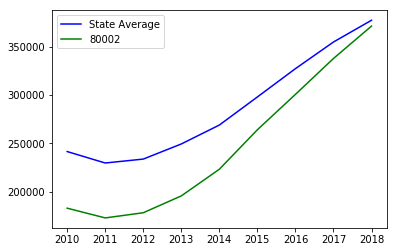

In [50]:
#Make the Plots

#test = zillow_df_sum.index.values
#test

test_loc = zillow_df_sum.loc[80002, '2012']
test_loc

#get the average housing prices for the whole state of Colorado

state_avg = round(zillow_df_sum.mean(), 0)
state_avg
          
#testing line graph

years = ["2010","2011","2012","2013","2014", "2015", "2016", "2017", "2018"]

home_value_avg, = plt.plot(years, state_avg, color="blue", label="State Average" )

zip_80002, = plt.plot(years, zillow_df_sum.loc[80002,["2010","2011","2012","2013","2014", "2015", "2016", "2017", "2018"]], 
                       color="green",label='80002', title='Colorado Average Housing Prices')


# Create a legend
plt.legend(handles=[home_value_avg, zip_80002], loc="best")

# Show the chart
plt.show()

        
        